In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#! pip install pickle
import pickle

In [3]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
df['SleepTime']=np.where(df['SleepTime']<=3,4,df.SleepTime)

In [6]:
df['SleepTime']=np.where(df['SleepTime']>14,14,df.SleepTime)

In [7]:
df['BMI']=np.where(df['BMI']<=14,14,df.BMI)

In [8]:
df['BMI']=np.where(df['BMI']>80,80,df.BMI)

In [9]:
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df['HeartDisease']=np.where(df['HeartDisease']=='Yes',1,0)

In [11]:
df['Smoking']=np.where(df['Smoking']=='Yes',1,0)

In [12]:
df['Stroke']=np.where(df['Stroke']=='Yes',1,0)

In [13]:
df['AlcoholDrinking']=np.where(df['AlcoholDrinking']=='Yes',1,0)

In [14]:
df['Diabetic']=np.where(df['Diabetic']=='Yes',1,0)

In [15]:
df['PhysicalActivity']=np.where(df['PhysicalActivity']=='Yes',1,0)

In [16]:
df['Asthma']=np.where(df['Asthma']=='Yes',1,0)

In [17]:
df['KidneyDisease']=np.where(df['KidneyDisease']=='Yes',1,0)

In [18]:
df['SkinCancer']=np.where(df['SkinCancer']=='Yes',1,0)

In [19]:
df['DiffWalking']=np.where(df['DiffWalking']=='Yes',1,0)

In [20]:
df['Sex']=np.where(df['Sex']=='Male',1,0)

In [21]:
df.AgeCategory.unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [22]:
lable={ '80 or older':13,'75-79':12,'70-74':11, '65-69':10,'60-64':9,'55-59':8, 
        '50-54':7, '45-49':6,'40-44':5, '35-39':4, '30-34':3, '25-29':2,'18-24':1
}
df['AgeCategory1']=df['AgeCategory'].map(lable)
df.drop(columns=['AgeCategory'],axis=1,inplace=True)

In [23]:
df.Race.unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [24]:
df.GenHealth.unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [25]:
lable={'Excellent':5,'Very good':4, 'Good':3,'Fair':2,'Poor':1}
df['GenHealth1']=df['GenHealth'].map(lable)
df.drop(columns=['GenHealth'],axis=1,inplace=True)

In [26]:
df=pd.get_dummies(df)
#df.drop(columns=['Race'],axis=1,inplace=True)

In [27]:
lable2={ 30:6,29:6,28:6,27:6,26:6,25:5,24:5,23:5,22:5,21:5,20:4,19:4,18:4,17:4,16:4,15:3,14:3,
        13:3,12:3,11:3,10:2,9:2,8:2,7:2,6:2,5:1,4:1,3:1,2:1,1:1,0:1}

df['PhysicalHealth1']=df['PhysicalHealth'].map(lable2)
df.drop(columns=['PhysicalHealth'],axis=1,inplace=True)

In [28]:
df['MentalHealth1']=df['MentalHealth'].map(lable2)
df.drop(columns=['MentalHealth'],axis=1,inplace=True)

In [29]:
x=df.drop(columns=['HeartDisease'])
y=df['HeartDisease']

# balancing the data

In [30]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,train_size=0.8, random_state=2,shuffle=y)

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(467875, 22)
(467875,)
(116969, 22)
(116969,)


# logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression,Ridge,Lasso
model=LogisticRegression(max_iter=500)

In [34]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [35]:
y_pred=model.predict(x_test)

In [36]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).head(20)

,Actual,Predicted
385881,1,0
138870,0,1
196717,0,0
70287,0,0
509001,1,1
375513,1,0
258299,0,0
262984,0,0
455358,1,1
133910,0,0


In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,log_loss
def val_values(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    ac=accuracy_score(y_test,y_pred)
    rec=recall_score(y_test,y_pred)
    prec=precision_score(y_test,y_pred)
    los=log_loss(y_test,y_pred)
    print('confusion_matrix=\n',cm)
    print('Accuracy',ac)
    print('recall',rec)
    print('precision',prec)
    print('loss',los)

In [38]:
from sklearn.metrics import classification_report
def val_class(y_test,y_pred):
    print(classification_report(y_test, y_pred))


In [39]:
val_values(y_test,y_pred)
val_class(y_test,y_pred)


confusion_matrix=
 [[44814 13330]
 [11854 46971]]
Accuracy 0.7846950901520916
recall 0.7984870378240544
precision 0.778942306097743
loss 7.436459261540879
              precision    recall  f1-score   support

           0       0.79      0.77      0.78     58144
           1       0.78      0.80      0.79     58825

    accuracy                           0.78    116969
   macro avg       0.78      0.78      0.78    116969
weighted avg       0.78      0.78      0.78    116969



# Ridge Regression

In [39]:
model_r=LogisticRegression(penalty='l2',C=100,max_iter=200)

In [40]:
model_r.fit(x_train,y_train)

LogisticRegression(C=100, max_iter=200)

In [41]:
y_pred_r=model_r.predict(x_test)

In [42]:
val_values(y_test,y_pred_r)
val_class(y_test,y_pred_r)


confusion_matrix=
 [[44829 13315]
 [11638 47187]]
Accuracy 0.7866699723858458
recall 0.8021589460263493
precision 0.7799246305907243
loss 7.368249143123301
              precision    recall  f1-score   support

           0       0.79      0.77      0.78     58144
           1       0.78      0.80      0.79     58825

    accuracy                           0.79    116969
   macro avg       0.79      0.79      0.79    116969
weighted avg       0.79      0.79      0.79    116969



# Grid search CV

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
parameters ={'penalty':['l1','l2'],
            'C':[0.001,0.01,0.5,1,2,5,10,100]}

In [45]:
model_g=LogisticRegression()

In [46]:
gscv=GridSearchCV(estimator=model_g,param_grid=parameters,cv=3,n_jobs=-1)

In [47]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.5, 1, 2, 5, 10, 100],
                         'penalty': ['l1', 'l2']})

In [48]:
gscv.best_params_

{'C': 1, 'penalty': 'l2'}

In [49]:
y_pred_g=gscv.predict(x_test)

In [50]:
val_values(y_test,y_pred_g)
val_class(y_test,y_pred_g)


confusion_matrix=
 [[44190 13954]
 [11183 47642]]
Accuracy 0.7850969060178338
recall 0.8098937526561836
precision 0.7734593155399702
loss 7.422585298851925
              precision    recall  f1-score   support

           0       0.80      0.76      0.78     58144
           1       0.77      0.81      0.79     58825

    accuracy                           0.79    116969
   macro avg       0.79      0.78      0.78    116969
weighted avg       0.79      0.79      0.78    116969



# NAIVE BAYES

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)

GaussianNB()

In [53]:
y_pred_nb=model_nb.predict(x_test)

In [54]:
pd.DataFrame({'Actual':y_test,'log reg':y_pred,'naive bay':y_pred_nb}).head(20)

,Actual,log reg,naive bay
385881,1,1,1
138870,0,1,1
196717,0,0,1
70287,0,0,0
509001,1,1,1
375513,1,1,1
258299,0,0,0
262984,0,0,1
455358,1,1,1
133910,0,0,0


In [61]:
y_pred_nb=model_nb.predict(x_test)

In [63]:
val_values(y_test,y_pred_nb)
val_class(y_test,y_pred_nb)

confusion_matrix=
 [[28810 29334]
 [ 5598 53227]]
Accuracy 0.7013567697424103
recall 0.9048363790905227
precision 0.6446990709899347
loss 10.31497227827918
              precision    recall  f1-score   support

           0       0.84      0.50      0.62     58144
           1       0.64      0.90      0.75     58825

    accuracy                           0.70    116969
   macro avg       0.74      0.70      0.69    116969
weighted avg       0.74      0.70      0.69    116969



# DecisionTree

In [64]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion ='gini',max_depth=35 ,random_state=1,max_features=19)

In [65]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=35, max_features=19, random_state=1)

In [66]:
y_pred_t = classifier.predict(x_test)

In [67]:
val_values(y_test,y_pred_t)
val_class(y_test,y_pred_t)

confusion_matrix=
 [[49344  8800]
 [ 6225 52600]]
Accuracy 0.8715471620685823
recall 0.894177645558861
precision 0.8566775244299675
loss 4.4366640032052835
              precision    recall  f1-score   support

           0       0.89      0.85      0.87     58144
           1       0.86      0.89      0.88     58825

    accuracy                           0.87    116969
   macro avg       0.87      0.87      0.87    116969
weighted avg       0.87      0.87      0.87    116969



# RandomForest

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
model=RandomForestClassifier(n_estimators=19,criterion='gini',max_depth=35)

In [96]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=35, n_estimators=19)

In [97]:
y_pred_f=model.predict(x_test)

In [98]:
val_values(y_test,y_pred_f)
val_class(y_test,y_pred_f)


confusion_matrix=
 [[50657  7487]
 [ 4615 54210]]
Accuracy 0.8965366892082518
recall 0.9215469613259668
precision 0.8786488808207854
loss 3.573547337475477
              precision    recall  f1-score   support

           0       0.92      0.87      0.89     58144
           1       0.88      0.92      0.90     58825

    accuracy                           0.90    116969
   macro avg       0.90      0.90      0.90    116969
weighted avg       0.90      0.90      0.90    116969



In [99]:
model.score(x_train,y_train)

0.9848869890462196

In [101]:
model.score(x_test,y_test)

0.8965366892082518

In [264]:
model_1=RandomForestClassifier(n_estimators=25,criterion='gini',max_depth=29,n_jobs=-1)

In [265]:
model_1.fit(x_train,y_train)

RandomForestClassifier(max_depth=29, n_estimators=25, n_jobs=-1)

In [266]:
y_pred_f=model_1.predict(x_test)

In [267]:
val_values(y_test,y_pred_f)
val_class(y_test,y_pred_f)


confusion_matrix=
 [[49667  8477]
 [ 4253 54572]]
Accuracy 0.8911677453000367
recall 0.927700807479813
precision 0.8655490174308871
loss 3.758990858215671
              precision    recall  f1-score   support

           0       0.92      0.85      0.89     58144
           1       0.87      0.93      0.90     58825

    accuracy                           0.89    116969
   macro avg       0.89      0.89      0.89    116969
weighted avg       0.89      0.89      0.89    116969



In [268]:
model_1.score(x_train,y_train)

0.9568239380176329

In [269]:
model_1.score(x_test,y_test)

0.8911677453000367

# ANN

In [40]:
import keras
import tensorflow as tf
from keras import models
from keras.models import Sequential
from keras.layers import Dense,Activation

In [41]:
model=Sequential()
model.add(Dense(500,input_dim=22,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [42]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [43]:
history=model.fit(x_train,y_train,epochs=3,verbose=1)

Epoch 1/3
14622/14622 [==============================] - 90s 6ms/step - loss: 0.4696 - accuracy: 0.7795
Epoch 2/3
14622/14622 [==============================] - 92s 6ms/step - loss: 0.4634 - accuracy: 0.7854
Epoch 3/3
14622/14622 [==============================] - 94s 6ms/step - loss: 0.4694 - accuracy: 0.7848


Text(0, 0.5, 'accuracy')

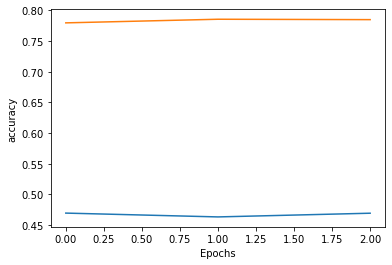

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')

In [45]:
model.evaluate(x_test,y_test)

3656/3656 [==============================] - 9s 2ms/step - loss: 0.4658 - accuracy: 0.7759


[0.46577683091163635, 0.7758722305297852]

In [46]:
y_pred=model.predict(x_test)

In [47]:
y_pred_hard=np.round(y_pred).astype(int)

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [49]:
print('Accuracy',accuracy_score(y_test,y_pred_hard))
print('confusion matrix',confusion_matrix(y_test,y_pred_hard))
print('F1 Score',f1_score(y_test,y_pred_hard))

Accuracy 0.7758722396532415
confusion matrix [[37623 20521]
 [ 5695 53130]]
F1 Score 0.8021075515565084


In [50]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_hard)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[37623, 20521],
       [ 5695, 53130]])>

Text(69.0, 0.5, 'Truth')

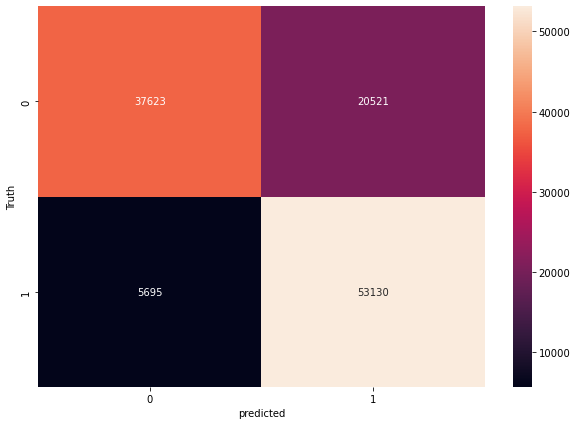

In [51]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [52]:
val_values(y_test,y_pred_hard)
val_class(y_test,y_pred_hard)

confusion_matrix=
 [[37623 20521]
 [ 5695 53130]]
Accuracy 0.7758722396532415
recall 0.9031874203144922
precision 0.7213751340782881
loss 7.7412388795992415
              precision    recall  f1-score   support

           0       0.87      0.65      0.74     58144
           1       0.72      0.90      0.80     58825

    accuracy                           0.78    116969
   macro avg       0.79      0.78      0.77    116969
weighted avg       0.79      0.78      0.77    116969



# Gradient boosting 

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
graidboost=GradientBoostingClassifier(n_estimators=800,learning_rate=0.99)#600

In [59]:
graidboost.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.99, n_estimators=800)

In [60]:
y_pred_g=graidboost.predict(x_test)

In [61]:
val_values(y_test,y_pred_g)
val_class(y_test,y_pred_g)


confusion_matrix=
 [[54382  3762]
 [ 6575 52250]]
Accuracy 0.9116261573579324
recall 0.8882277943051424
precision 0.9328358208955224
loss 3.0523501071200423
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     58144
           1       0.93      0.89      0.91     58825

    accuracy                           0.91    116969
   macro avg       0.91      0.91      0.91    116969
weighted avg       0.91      0.91      0.91    116969



In [62]:
graidboost.score(x_train,y_train)

0.9190382046486776

In [63]:
graidboost.score(x_test,y_test)

0.9116261573579324

# xgboost

In [40]:
from xgboost import XGBClassifier

In [41]:
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 11,
            'alpha': 10,
            'learning_rate': 0.9,
            'n_estimators':300,
             
        }
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(x_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.9, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=11, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)

In [42]:
print(xgb_clf)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.9, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=11, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)


In [43]:
y_pred_XG=xgb_clf.predict(x_test)

In [44]:
val_values(y_test,y_pred_XG)
val_class(y_test,y_pred_XG)


confusion_matrix=
 [[53946  4198]
 [ 4841 53984]]
Accuracy 0.9227231146714087
recall 0.9177050573735657
precision 0.927847100477811
loss 2.6690777602921254
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     58144
           1       0.93      0.92      0.92     58825

    accuracy                           0.92    116969
   macro avg       0.92      0.92      0.92    116969
weighted avg       0.92      0.92      0.92    116969



In [45]:
xgb_clf.score(x_train,y_train)

0.9556719209190488

In [46]:
xgb_clf.score(x_test,y_test)

0.9227231146714087

In [47]:
import pickle
pickle_out=open('classifiermodel.pkl','wb')
pickle.dump(xgb_clf,pickle_out)
pickle_out.close()

In [47]:
joblib.dump(xgb_clf,'model_heartproject')

['model_heartproject']

In [3]:
model=pickle.load(open('classifiermodel.pkl','rb'))

In [6]:
arr1 = np.array([24,0,0,0,0,1,0,1,11,0,0,0,1,5,0,1,0,0,0,0,5,4]).reshape(1,22)
prediction=model.predict(arr1)
if prediction==0:
    print('Patient safe')
else:
    print('Patient not safe')


Patient safe


In [125]:
x_train.head(1)

,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,SleepTime,Asthma,...,AgeCategory1,GenHealth1,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,PhysicalHealth1,MentalHealth1
26036,28.97,0,0,0,0,0,0,1,7.0,0,...,8,3,0,0,0,0,0,1,1,1


In [162]:
x_test.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'Diabetic', 'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'AgeCategory1', 'GenHealth1',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'PhysicalHealth1',
       'MentalHealth1'],
      dtype='object')

In [5]:
arr1 = np.array([24,0,0,0,0,1,0,1,11,0,0,0,1,5,0,1,0,0,0,0,5,4]).reshape(1,22)
prediction=xgb_clf.predict(arr1)
if prediction==0:
    print('Patient safe')
else:
    print('Patient not safe')


Patient safe


# Standardize the Data

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
x_sm = StandardScaler().fit_transform(x_sm)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,train_size=0.8, random_state=2,shuffle=y)

# KNN(K nearest neighbour)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=5)

In [39]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
y_pred_knn=model_knn.predict(x_test)

In [41]:
val_values(y_test,y_pred_knn)
val_class(y_test,y_pred_knn)

confusion_matrix=
 [[45933 12211]
 [ 5535 53290]]
Accuracy 0.8482845882242304
recall 0.9059073523161921
precision 0.813575365261599
loss 5.2401481571040645
              precision    recall  f1-score   support

           0       0.89      0.79      0.84     58144
           1       0.81      0.91      0.86     58825

    accuracy                           0.85    116969
   macro avg       0.85      0.85      0.85    116969
weighted avg       0.85      0.85      0.85    116969



# SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#param_grid = {'C' : [2, 1,5 ,10],
 #             'gamma' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7 ],
  #            'kernel' : ['rbf', 'linear']
   #          }
grid =svm.SVC()
grid.fit(x_train,y_train)

In [ ]:
model.score(x_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
y_pred_svm=model.predict(x_test)

In [ ]:
val_values(y_test,y_pred_svm)
val_class(y_test,y_pred_svm)

# ANN

In [56]:
model=Sequential()
model.add(Dense(500,input_dim=22,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [57]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [58]:
history=model.fit(x_train,y_train,epochs=3,verbose=1)

Epoch 1/3
14622/14622 [==============================] - 90s 6ms/step - loss: 0.4480 - accuracy: 0.7892
Epoch 2/3
14622/14622 [==============================] - 90s 6ms/step - loss: 0.4436 - accuracy: 0.7919
Epoch 3/3
14622/14622 [==============================] - 89s 6ms/step - loss: 0.4434 - accuracy: 0.7931


Text(0, 0.5, 'accuracy')

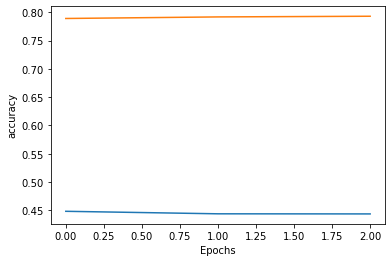

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')

In [60]:
model.evaluate(x_test,y_test)

3656/3656 [==============================] - 10s 3ms/step - loss: 0.4431 - accuracy: 0.7926


[0.4430871307849884, 0.7926031947135925]

In [61]:
y_pred=model.predict(x_test)

In [62]:
y_pred_hard=np.round(y_pred).astype(int)

In [63]:
print('Accuracy',accuracy_score(y_test,y_pred_hard))
print('confusion matrix',confusion_matrix(y_test,y_pred_hard))
print('F1 Score',f1_score(y_test,y_pred_hard))

Accuracy 0.7926031683608478
confusion matrix [[43526 14618]
 [ 9641 49184]]
F1 Score 0.8021724416319408


In [64]:
print(val_values(y_test,y_pred_hard))
print(val_class(y_test,y_pred_hard))

confusion_matrix=
 [[43526 14618]
 [ 9641 49184]]
Accuracy 0.7926031683608478
recall 0.8361070973225669
precision 0.7708849252374533
loss 7.163332721313964
None
              precision    recall  f1-score   support

           0       0.82      0.75      0.78     58144
           1       0.77      0.84      0.80     58825

    accuracy                           0.79    116969
   macro avg       0.79      0.79      0.79    116969
weighted avg       0.79      0.79      0.79    116969

None
